<a href="https://www.kaggle.com/code/sagaraman8/personality-prediction-with-eda-and-key-findings?scriptVersionId=249393051" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Personality Prediction using Machine Learning

# Problem Statement

The goal of this project is to build a machine learning model that can accurately predict whether an individual is an 'Extrovert' or 'Introvert' based on various personal and social attributes. The dataset contains information on factors such as time spent alone, social event attendance, stage fear, and more. The developed model will be evaluated on its ability to generalize to new, unseen data.

# Dataset Description

This dataset contains information about individuals and their personality types, categorized as either 'Extrovert' or 'Introvert'. The dataset includes features such as:

*   `id`: Unique identifier for each individual.
*   `Time_spent_Alone`: Amount of time spent alone.
*   `Stage_fear`: Indicates if the individual has stage fear (Yes/No).
*   `Social_event_attendance`: Frequency of attending social events.
*   `Going_outside`: Frequency of going outside.
*   `Drained_after_socializing`: Indicates if the individual feels drained after socializing (Yes/No).
*   `Friends_circle_size`: Size of the individual's friends circle.
*   `Post_frequency`: Frequency of making social media posts.
*   `Personality`: The target variable, indicating personality type (Extrovert/Introvert).

# Various ML algorithms Used in this notebook.

Several classification models were imported and evaluated to determine the best fit for predicting personality:

*   **RandomForestClassifier**: An ensemble learning method that builds multiple decision trees.
*   **LogisticRegression**: A linear model for binary classification.
*   **SVC (Support Vector Classifier)**: A powerful model that finds an optimal hyperplane to separate classes.
*   **KNeighborsClassifier**: A simple algorithm that classifies based on the majority class of nearest neighbors.
*   **DecisionTreeClassifier**: A tree-like model that makes decisions based on feature values.
*   **GaussianNB (Gaussian Naive Bayes)**: A probabilistic classifier based on Bayes' theorem.
*   **GradientBoostingClassifier**: An ensemble method that builds trees sequentially, correcting the errors of previous trees.
*   **XGBClassifier (Extreme Gradient Boosting)**: An optimized gradient boosting implementation known for its performance.

# Importing Libraries

In [1]:
# For data cleaning and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# For Data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# For Model Selection and Metric calculation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Various ML algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Importing Datasets

In [2]:
test_df = pd.read_csv("/kaggle/input/playground-series-s5e7/test.csv")
train_df = pd.read_csv("/kaggle/input/playground-series-s5e7/train.csv")
print("Test Data Shape: ", test_df.shape)
print("Train Data Shape: ", train_df.shape)

Test Data Shape:  (6175, 8)
Train Data Shape:  (18524, 9)


# Knowing the basics of the the data sets

In [3]:
train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [4]:
test_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [5]:
print("Train Data info: ")
print( train_df.info())
print("\nTest Data info: ")
print(test_df.info())

Train Data info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB
None

Test Data info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------

# Missing Data Percentage

## Let's see how much missing data is present in each columns in both train and test dataset

In [6]:
def get_null_values():
  # Creating a DataFrame with percentage of missing data from the columns of Train Data.
  train_null_cols = train_df.columns[train_df.isnull().any()].tolist()
  train_null_cols_num = [train_df[col].isnull().sum() for col in train_null_cols]
  train_null_cols_percentage = [train_df[col].isnull().sum()/train_df.shape[0]*100 for col in train_null_cols]
  train_null_df = pd.DataFrame({'Column Name': train_null_cols,
                                'Missing Number': train_null_cols_num,
                                'Missing Percentage': train_null_cols_percentage})

  # Creating a DataFrame with percentage of missing data from the columns of Test data.
  test_null_cols = test_df.columns[test_df.isnull().any()].tolist()
  test_null_cols_num = [test_df[col].isnull().sum() for col in test_null_cols]
  test_null_cols_percentage = [test_df[col].isnull().sum()/test_df.shape[0]*100 for col in test_null_cols]
  test_null_df = pd.DataFrame({'Column Name': test_null_cols,
                                'Missing Number': test_null_cols_num,
                                'Missing Percentage': test_null_cols_percentage})

  print("Train Data Missing Data: ")
  print(train_null_df)
  print("\nTest Data Missing Data: ")
  print(test_null_df)

get_null_values()

Train Data Missing Data: 
                 Column Name  Missing Number  Missing Percentage
0           Time_spent_Alone            1190            6.424098
1                 Stage_fear            1893           10.219175
2    Social_event_attendance            1180            6.370114
3              Going_outside            1466            7.914057
4  Drained_after_socializing            1149            6.202764
5        Friends_circle_size            1054            5.689916
6             Post_frequency            1264            6.823580

Test Data Missing Data: 
                 Column Name  Missing Number  Missing Percentage
0           Time_spent_Alone             425            6.882591
1                 Stage_fear             598            9.684211
2    Social_event_attendance             397            6.429150
3              Going_outside             466            7.546559
4  Drained_after_socializing             432            6.995951
5        Friends_circle_size          

# Handling Missing Data

## Let's start with `Stage_fear` Column
▶ Let's see whats the frequency of `Yes` and `No` in stage fear column

In [7]:
print(train_df['Stage_fear'].value_counts())
print("\nPercentage of values in Stage_fear:")
print(train_df['Stage_fear'].value_counts(normalize=True) * 100)

Stage_fear
No     12609
Yes     4022
Name: count, dtype: int64

Percentage of values in Stage_fear:
Stage_fear
No     75.816247
Yes    24.183753
Name: proportion, dtype: float64


▶ As we can see the `No` values dominates the column. So, we can impute this with the mode of this column. But that can make a bised output from the model.

▶ We can use group by imputation, because this column is closely related to other columns of the dataset. But, this could also arise a big problem because right now all the columns of this dataset has missing values.

▶ So, what's the solution then, perfect question. See, This column `Stage_fear` has a very important data about the personality of that person and if the person does not specified if he/she has stage fear or not it's also means something about that person.

▶ So, we have to preserve this NaN values with a constant unknown values. Let's say `U` in this case. So, I will impute this column with constant value `U`.

In [8]:
# Impute missing 'Stage_fear' values with 'U' in both dataframes
train_df['Stage_fear'].fillna('U', inplace=True)
test_df['Stage_fear'].fillna('U', inplace=True)

print("Null values in stage_fear column in train data: ")
display(train_df['Stage_fear'].isnull().sum())
print("Null values in stage_fear column in train data: ")
display(test_df['Stage_fear'].isnull().sum())

Null values in stage_fear column in train data: 


0

Null values in stage_fear column in train data: 


0

▶ We are done with `Stage_fear` column, Now it does not have any missing values.

## Missing value in Social_event_attendance column

▶ Let's now see the `Social_event_attendance` column.

▶ There is approx `6%` missing value is available in this column, lets see the distribution function to see hoe can we impute this column.

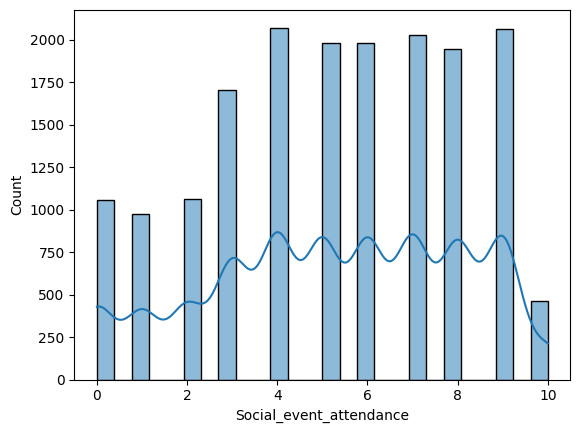

In [9]:
sns.histplot(x='Social_event_attendance', data=train_df, kde=True)
plt.show()

▶ After seeing this distribution graph we can not see any perfect normal distribution or even skewed curve and it is also a column with numerical column so, I will impute this `Social_event_attendance` column with SimpleImputer method using `median` as strategy, To be on safer side.

In [10]:
imputer_SET = SimpleImputer(strategy='median')
train_df['Social_event_attendance'] = imputer_SET.fit_transform(train_df[['Social_event_attendance']])
test_df['Social_event_attendance'] = imputer_SET.transform(test_df[['Social_event_attendance']])

print("Null values in stage_fear column in train data: ")
display(train_df['Social_event_attendance'].isnull().sum())
print("Null values in stage_fear column in train data: ")
display(test_df['Social_event_attendance'].isnull().sum())

Null values in stage_fear column in train data: 


0

Null values in stage_fear column in train data: 


0

In [11]:
get_null_values()

Train Data Missing Data: 
                 Column Name  Missing Number  Missing Percentage
0           Time_spent_Alone            1190            6.424098
1              Going_outside            1466            7.914057
2  Drained_after_socializing            1149            6.202764
3        Friends_circle_size            1054            5.689916
4             Post_frequency            1264            6.823580

Test Data Missing Data: 
                 Column Name  Missing Number  Missing Percentage
0           Time_spent_Alone             425            6.882591
1              Going_outside             466            7.546559
2  Drained_after_socializing             432            6.995951
3        Friends_circle_size             350            5.668016
4             Post_frequency             408            6.607287


## Missing Values in `Going_outside` column

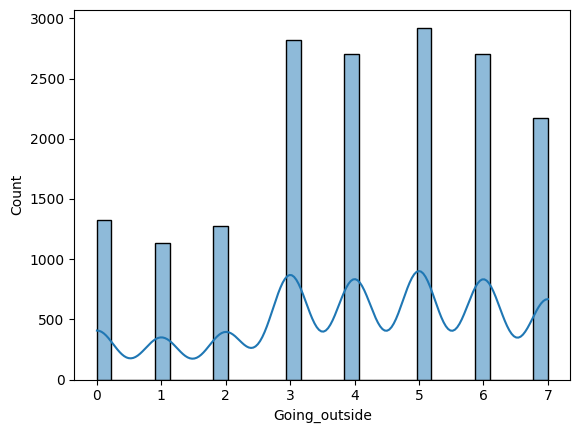

In [12]:
sns.histplot(x='Going_outside', data=train_df, kde=True)
plt.show()

▶ This `Going_outside` columns has same time of data distribution as `Social_event_attendance` column. So, I will use the same method as before

In [13]:
imputer_GO = SimpleImputer(strategy='median')
train_df['Going_outside'] = imputer_GO.fit_transform(train_df[['Going_outside']])
test_df['Going_outside'] = imputer_GO.transform(test_df[['Going_outside']])

print("Null values in stage_fear column in train data: ")
display(train_df['Going_outside'].isnull().sum())
print("Null values in stage_fear column in train data: ")
display(test_df['Going_outside'].isnull().sum())

Null values in stage_fear column in train data: 


0

Null values in stage_fear column in train data: 


0

## Missing values in `Time_spent_Alone` Column

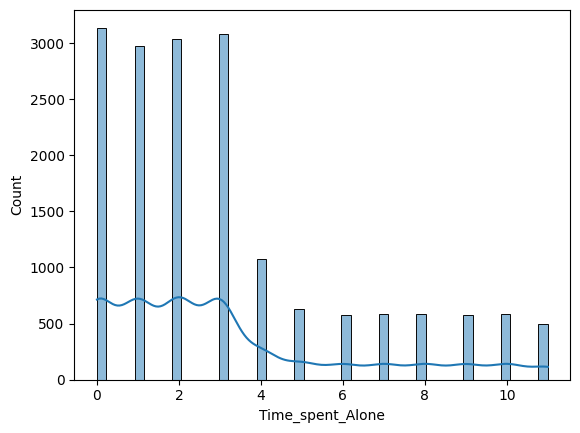

In [14]:
sns.histplot(x='Time_spent_Alone', data=train_df, kde=True)
plt.show()

▶ This column highly right skewed graph. So, here we have to use median imputation as before

In [15]:
imputer_TSA = SimpleImputer(strategy='median')
train_df['Time_spent_Alone'] = imputer_TSA.fit_transform(train_df[['Time_spent_Alone']])
test_df['Time_spent_Alone'] = imputer_TSA.transform(test_df[['Time_spent_Alone']])

print("Null values in stage_fear column in train data: ")
display(train_df['Time_spent_Alone'].isnull().sum())
print("Null values in stage_fear column in train data: ")
display(test_df['Time_spent_Alone'].isnull().sum())

get_null_values()

Null values in stage_fear column in train data: 


0

Null values in stage_fear column in train data: 


0

Train Data Missing Data: 
                 Column Name  Missing Number  Missing Percentage
0  Drained_after_socializing            1149            6.202764
1        Friends_circle_size            1054            5.689916
2             Post_frequency            1264            6.823580

Test Data Missing Data: 
                 Column Name  Missing Number  Missing Percentage
0  Drained_after_socializing             432            6.995951
1        Friends_circle_size             350            5.668016
2             Post_frequency             408            6.607287


## MIssing values in `Friends_circle_size` column

▶ This column is closely related to `Time_spent_Alone`, `Going_outside` and `Social_event_attendence` columns. So, I am using group by imputation with median with this columns for better imputation.

In [16]:
train_df['Friends_circle_size'] = train_df.groupby(['Time_spent_Alone',
                                                    'Going_outside',
                                                    'Social_event_attendance']
                                                   )['Friends_circle_size'].transform(lambda x: x.fillna(x.median()))
test_df['Friends_circle_size'] = test_df.groupby(['Time_spent_Alone',
                                                  'Going_outside',
                                                  'Social_event_attendance']
                                                 )['Friends_circle_size'].transform(lambda x: x.fillna(x.median()))

get_null_values()

Train Data Missing Data: 
                 Column Name  Missing Number  Missing Percentage
0  Drained_after_socializing            1149            6.202764
1        Friends_circle_size               1            0.005398
2             Post_frequency            1264            6.823580

Test Data Missing Data: 
                 Column Name  Missing Number  Missing Percentage
0  Drained_after_socializing             432            6.995951
1        Friends_circle_size               3            0.048583
2             Post_frequency             408            6.607287


▶ Afte group by imputation there are some rows left with missing values. Let's see the distribution graph of this column

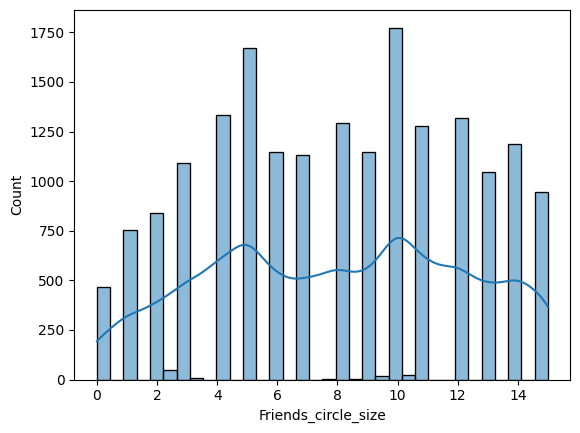

In [17]:
sns.histplot(x='Friends_circle_size', data=train_df, kde=True)
plt.show()

▶ Since its distribution graph is not a normal distribution. I am imputing the rest of the missing data with median of this column.

In [18]:
train_df['Friends_circle_size'] = train_df['Friends_circle_size'].fillna(train_df['Friends_circle_size'].median())
test_df['Friends_circle_size'] = test_df['Friends_circle_size'].fillna(test_df['Friends_circle_size'].median())

get_null_values()

Train Data Missing Data: 
                 Column Name  Missing Number  Missing Percentage
0  Drained_after_socializing            1149            6.202764
1             Post_frequency            1264            6.823580

Test Data Missing Data: 
                 Column Name  Missing Number  Missing Percentage
0  Drained_after_socializing             432            6.995951
1             Post_frequency             408            6.607287


## Missing values in `Post_frequency` column.

▶ Let's see the distribution graph of this column.

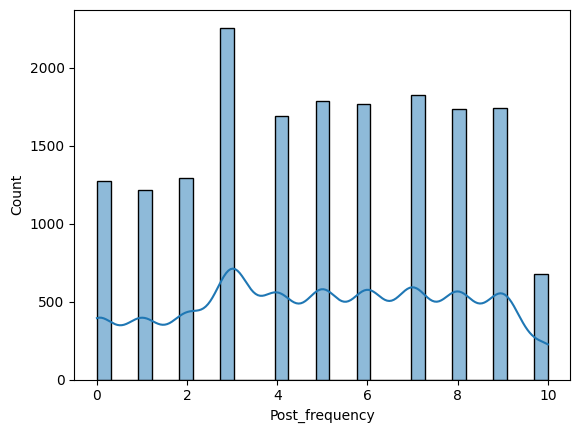

In [19]:
sns.histplot(x='Post_frequency', data=train_df, kde=True)
plt.show()

▶ This graph also does not so that if it's normal distribution or not. So, also imputing this column with median of this columns.

In [20]:
train_df['Post_frequency'] = train_df['Post_frequency'].fillna(train_df['Post_frequency'].median())
test_df['Post_frequency'] = test_df['Post_frequency'].fillna(test_df['Post_frequency'].median())

get_null_values()

Train Data Missing Data: 
                 Column Name  Missing Number  Missing Percentage
0  Drained_after_socializing            1149            6.202764

Test Data Missing Data: 
                 Column Name  Missing Number  Missing Percentage
0  Drained_after_socializing             432            6.995951


## Missing values in `Drained_after_socializing` column

▶Since its also similar to `Stagw_fear` column. So, I will impute this with similar method as the `Stage_fear` column with constant value 'U'

In [21]:
train_df['Drained_after_socializing'].fillna('U', inplace=True)
test_df['Drained_after_socializing'].fillna('U', inplace=True)

print("Total number of null values in train Data: ", train_df.isnull().sum().sum())
print("Total number of null values in test Data: ", test_df.isnull().sum().sum())

Total number of null values in train Data:  0
Total number of null values in test Data:  0


# Visualizing Dataset

## Defining a compare plot function.

In [22]:
def compare_plot(col):
  fig, axes = plt.subplots(1, 2, figsize=(10,5))
  ax1 = sns.countplot(x=col, data=train_df,hue='Personality',ax=axes[0])
  ax1.tick_params(axis='x', rotation=0)
  ax1.set_title(f'{col} vs Personality')
  ax1.legend(title='Personality')

  cross_tab = pd.crosstab(train_df[col], train_df['Personality'])
  ax2 = cross_tab.plot(kind='bar', stacked=True, ax=axes[1])
  ax2.tick_params(axis='x', rotation=0)
  ax2.set_title(f"Bar plot of Crosstab between {col} and Personality")
  plt.show()

  print(f'\nPercentage of Personality by {col}:\n{cross_tab.round(2)}\n')

▶ This finction takes a categorical column as an argument and plots two comparison graphs between that column and the `Pesonality` column.



*   First graph is countplot.
*   And the second one is bar plot with the cross tab of that column with the `Personality` column.



## Let's start with `Stage_fear` column.

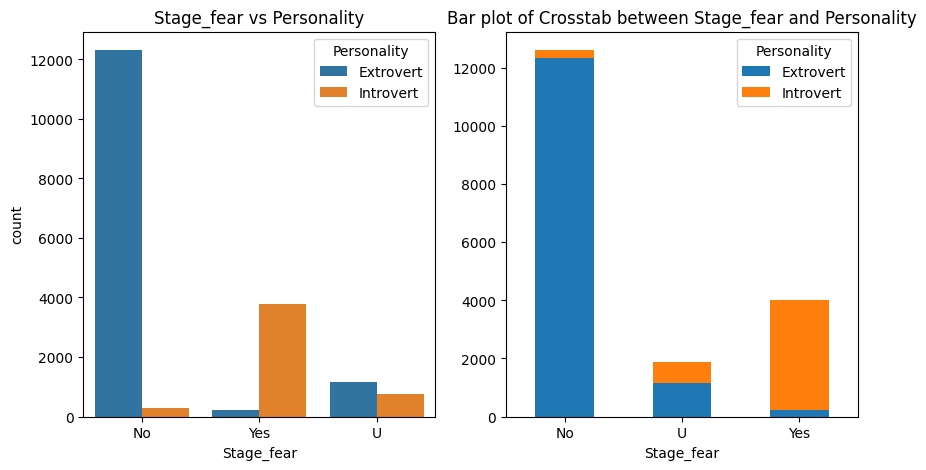


Percentage of Personality by Stage_fear:
Personality  Extrovert  Introvert
Stage_fear                       
No               12314        295
U                 1149        744
Yes                236       3786



In [23]:
compare_plot('Stage_fear')

▶ From the above graph we can clearly say that the person with Stage fear are most likely to be Introvert.

## plotting `Drained_after_socializing` column

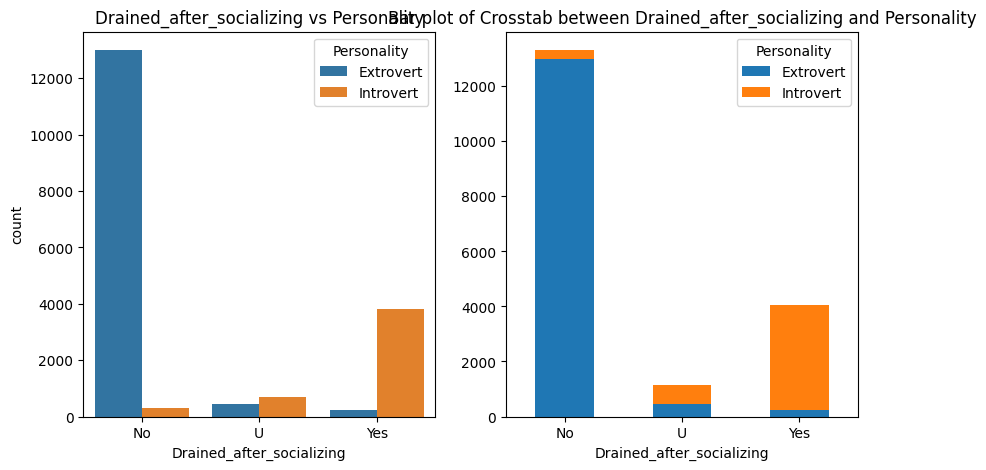


Percentage of Personality by Drained_after_socializing:
Personality                Extrovert  Introvert
Drained_after_socializing                      
No                             13001        312
U                                462        687
Yes                              236       3826



In [24]:
compare_plot('Drained_after_socializing')

▶ This graph specifies that the person who get Drained after socializing are most likely to be introvert.

▶ The above two columns we have used are categorical column and both of they are closely realted to `Personality` of that person.

▶ Now we need to see the relation between numerical columns and `Personality` column.

## Defining a distribution_plot function.

In [25]:
def distribution_plot(column):
  plt.figure(figsize=(10, 6))
  sns.histplot(data=train_df, x=column, hue='Personality', kde=True, multiple="stack")
  plt.title(f'Distribution of {column} by Personality')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

▶ This function takes a numerical column as an input and plots a distribution curve with camparision with `Personality` column as color and kde

## Let's Start with `Time_spent_Alone` Column


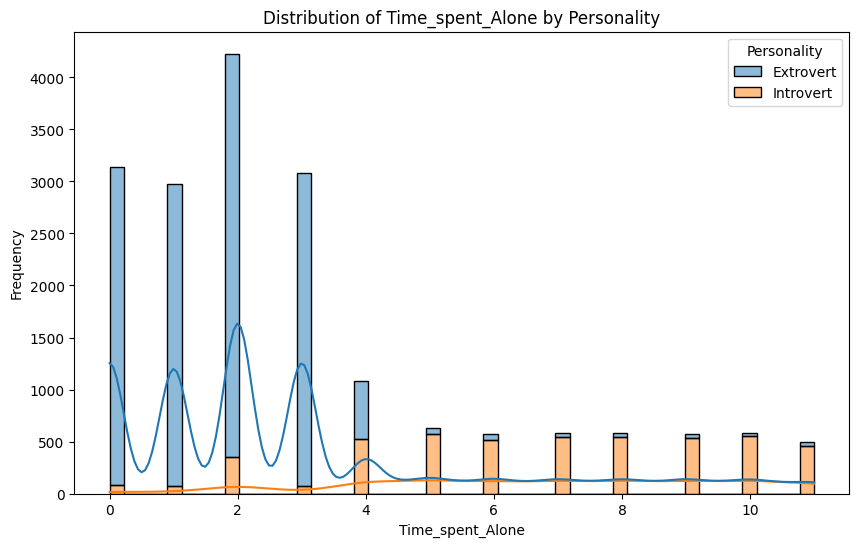

In [26]:
distribution_plot('Time_spent_Alone')

▶ With this graph we can clearly say that as the time spent alone of a person increases the person is most likely to to introvert.

## Ploting the Distribution graph of `Social_event_attendance` column

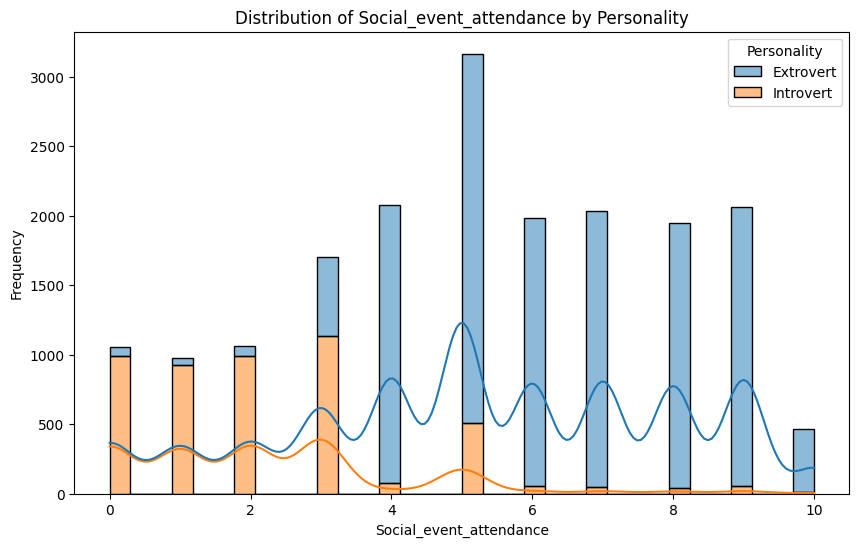

In [27]:
distribution_plot('Social_event_attendance')

▶ With this graph we can clearly say that as Social Event Attendence of a person decreases the person is most likely to be an introvert.

## Ploting the Distribution graph of `Going_outside` Column

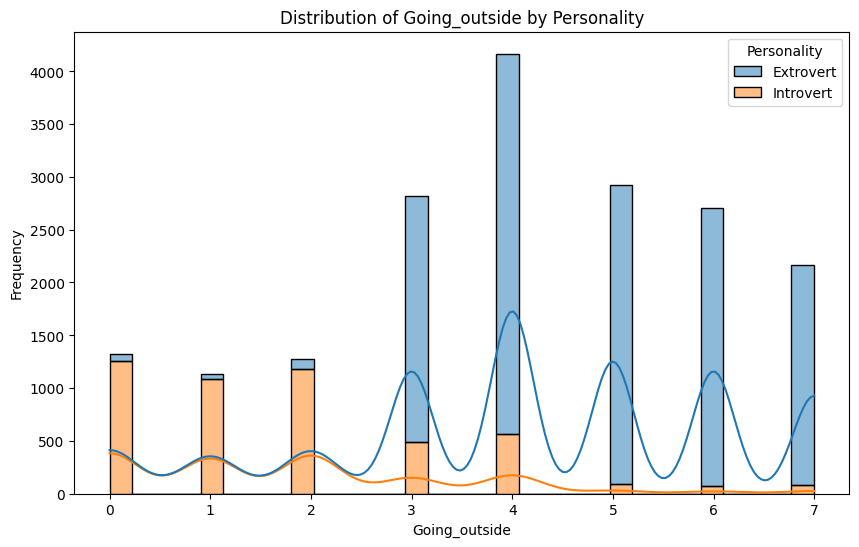

In [28]:
distribution_plot('Going_outside')

▶With this graph we can clearly say that as the Going Outside time decreases the possibility of being an introvert increases.

## Ploting the Distribution graph of `Friend_circle_size` column

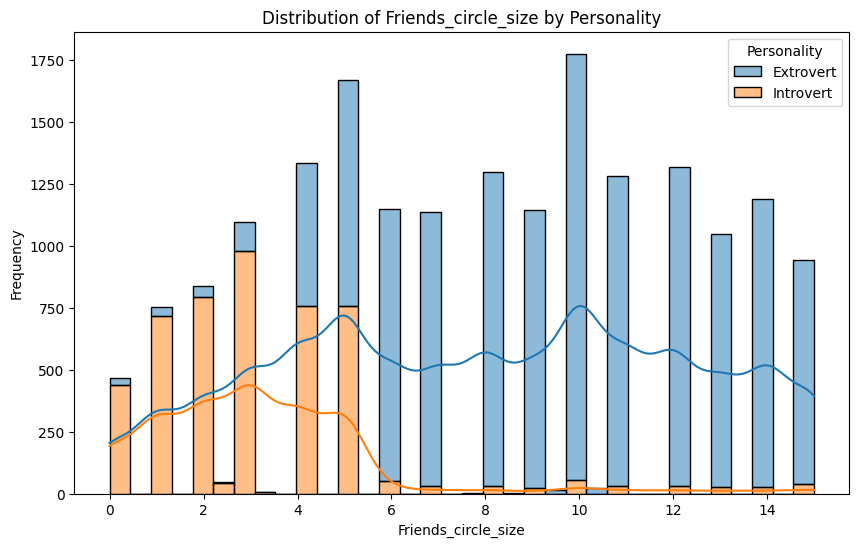

In [29]:
distribution_plot('Friends_circle_size')

▶ As the Friend Circle size decreases the possibility of being an introvert increases.

## Ploting a Distribution graph of `Post_frequency` column.

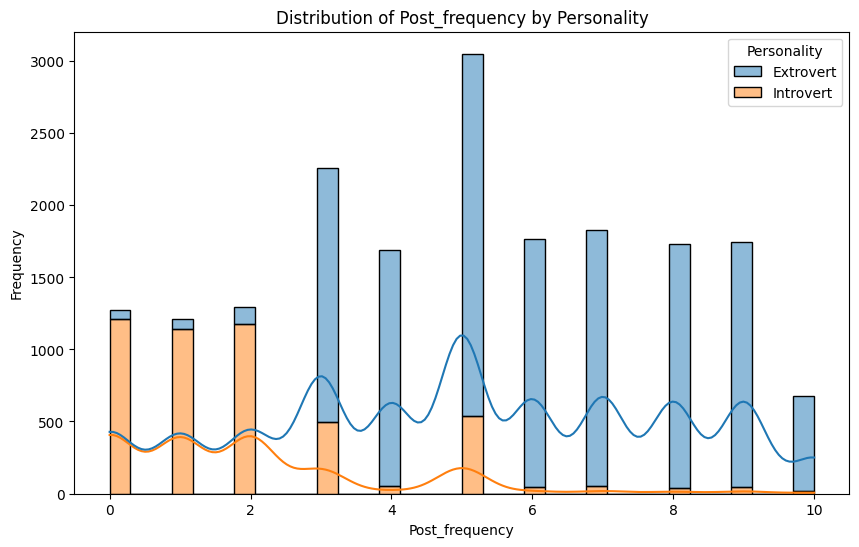

In [30]:
distribution_plot('Post_frequency')

▶ As the post frequency decreases the possibility of being introvert increases.

# Data Preprocessing

## Creating Dummies of the categorical columns.

In [31]:
train_df = pd.get_dummies(train_df, columns=['Stage_fear','Drained_after_socializing'], dummy_na=False)
test_df = pd.get_dummies(test_df, columns=['Stage_fear','Drained_after_socializing'], dummy_na=False)

print("Shape of train data after creating dummies: ", train_df.shape)
print("Shape of test data after creating dummies: ", test_df.shape)

Shape of train data after creating dummies:  (18524, 13)
Shape of test data after creating dummies:  (6175, 12)


In [32]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             18524 non-null  int64  
 1   Time_spent_Alone               18524 non-null  float64
 2   Social_event_attendance        18524 non-null  float64
 3   Going_outside                  18524 non-null  float64
 4   Friends_circle_size            18524 non-null  float64
 5   Post_frequency                 18524 non-null  float64
 6   Personality                    18524 non-null  object 
 7   Stage_fear_No                  18524 non-null  bool   
 8   Stage_fear_U                   18524 non-null  bool   
 9   Stage_fear_Yes                 18524 non-null  bool   
 10  Drained_after_socializing_No   18524 non-null  bool   
 11  Drained_after_socializing_U    18524 non-null  bool   
 12  Drained_after_socializing_Yes  18524 non-null 

## Droping the `id` column from both the datasets.

In [33]:
train_df = train_df.drop(['id'], axis=1)
pre_test_df = test_df.drop(['id'], axis=1)

## Standarization of numerical Column.

▶ Creating a list f numerical columns for both Training and test dataset.

In [34]:
numerical_cols_train = train_df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_test = pre_test_df.select_dtypes(include=np.number).columns.tolist()

print(numerical_cols_train)
print(numerical_cols_test)

['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']


▶ Appling the StandardScaler function on those numerical columns.

In [35]:
scaler = StandardScaler()
for col in numerical_cols_train:
  train_df[col] = scaler.fit_transform(train_df[[col]])
  pre_test_df[col] = scaler.transform(pre_test_df[[col]])

train_df.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_No,Stage_fear_U,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_U,Drained_after_socializing_Yes
0,-1.049913,0.282102,-0.020620,1.682540,0.006002,Extrovert,True,False,False,True,False,False
1,-0.707327,0.657346,-0.525859,0.487202,1.085490,Extrovert,True,False,False,True,False,False
2,1.005601,-1.594120,-2.041578,-1.186272,-1.793144,Introvert,False,False,True,False,True,False
3,-0.022156,0.657346,-0.525859,0.726269,0.006002,Extrovert,True,False,False,True,False,False
4,-0.707327,-0.468387,-0.020620,1.204404,0.006002,Extrovert,True,False,False,True,False,False


## Incoding the `Personality` Column.

▶ Right now the `Personality` column containg the values as Extrovert and introvert that's in the form of object or we can say string that can rise problem for some model. Because they only handle numerical values.

▶ That's why I am converting the Extrovert and Introvert to values 0 and 1 repectively.

In [36]:
train_df['Personality'] = train_df['Personality'].replace({'Extrovert':0, 'Introvert':1})

## Creating the X and y variable.

* X - Label variable that has columns that are used to predict the target values.

* y - Traget Varibale that contains the column with the values to be predicted

In [37]:
X = train_df.drop('Personality', axis=1)
y = train_df['Personality']

# Model Selection

## Selecting best model for this dataset.

▶ Here we be see which machine learning algorithm performs better on the basis of accuracy.

In [38]:
models = [('Random Forest', RandomForestClassifier()),
          ('Logistic Regression', LogisticRegression()),
          ('SVM', SVC()),
          ('KNeighborsClassifier', KNeighborsClassifier()),
          ('Decision Tree', DecisionTreeClassifier()),
          ('Gaussian NB', GaussianNB()),
          ('Gradient Boosting', GradientBoostingClassifier()),
          ('XG Boosting', XGBClassifier())]

for name, model in models:
  scores = cross_val_score(model, X, y, cv=5)
  print(f'{name} Accuracy: {scores.mean()}')

Random Forest Accuracy: 0.9641549275248262
Logistic Regression Accuracy: 0.9690134165784956
SVM Accuracy: 0.9689054543652702
KNeighborsClassifier Accuracy: 0.9686895153650866
Decision Tree Accuracy: 0.9325204396603738
Gaussian NB Accuracy: 0.9665841210435959
Gradient Boosting Accuracy: 0.968905498086469
XG Boosting Accuracy: 0.9681497188726926


▶ From the above output we cab say that `Logistic Regression` performs better than other on the basis of accuracy.

# Fine Tunning the Model

▶ Here we will fine tune the selected model for achieving more accuracy.

In [39]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: ", grid_search.best_score_)

best_lr_model = grid_search.best_estimator_

Best Parameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy:  0.969229384726145


▶ We have fine tuned the model and also defined the best model with best hyperparameters and achieved an accuracy of 96.922%.

# Predicting the Test Data set

▶Here we will use the best model to predict the personality of test dataset.

▶ And also convert the personality values from 0 and 1 to Extrovert and Introvert repectively.

In [40]:
prediction = best_lr_model.predict(pre_test_df)
predictions_final = pd.Series(prediction).map({0:'Extrovert', 1:'Introvert'})
predictions_final

0       Extrovert
1       Introvert
2       Extrovert
3       Extrovert
4       Introvert
          ...    
6170    Extrovert
6171    Introvert
6172    Extrovert
6173    Extrovert
6174    Introvert
Length: 6175, dtype: object

# Creating the submission File

▶ Perfect submission file for the competition.

In [41]:
submission = pd.DataFrame({'id': test_df['id'], 'Personality': predictions_final})
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully.")

Submission file created successfully.


# Summary

This notebook performs an end-to-end machine learning workflow to predict personality based on various features.

1.  **Data Loading and Initial Exploration**: The `train.csv` and `test.csv` datasets were loaded into pandas DataFrames. Initial checks on the shape of the dataframes and a preview of the first few rows were performed to understand the data structure.

2.  **Data Information and Null Value Handling**: The `info()` method was used to inspect data types and identify missing values. A custom function `get_null_values()` was created to quantify missing data in both train and test sets. Different strategies were employed to handle missing values in specific columns:
    *   Missing values in 'Stage\_fear' and 'Drained\_after\_socializing' were imputed with the category 'U'.
    *   Missing values in 'Social\_event\_attendance', 'Going\_outside', 'Time\_spent\_Alone', and 'Post\_frequency' were imputed with the median value of their respective columns.
    *   Missing values in 'Friends\_circle\_size' were imputed based on the median of groups defined by 'Time\_spent\_Alone', 'Going\_outside', and 'Social\_event\_attendance', followed by a general median imputation for any remaining missing values.

3.  **Data Visualization**: Histograms and count plots were used to visualize the distribution of features and their relationship with the 'Personality' target variable. These visualizations helped in understanding the data and the potential predictive power of the features.

4.  **Data Preprocessing**:
    *   Categorical features ('Stage\_fear' and 'Drained\_after\_socializing') were one-hot encoded to convert them into a numerical format suitable for machine learning models.
    *   Numerical features ('Time\_spent\_Alone', 'Social\_event\_attendance', 'Going\_outside', 'Friends\_circle\_size', 'Post\_frequency') were scaled using `StandardScaler` to standardize their ranges.
    *   The 'Personality' column in the training data was encoded numerically ('Extrovert': 0, 'Introvert': 1).
    *   The 'id' column was dropped from both the training and test data as it is not a predictive feature.

5.  **Model Training and Evaluation**: Several classification models were trained and evaluated using 5-fold cross-validation to assess their performance on the training data. The models evaluated included:
    *   Random Forest Classifier
    *   Logistic Regression
    *   SVM
    *   KNeighbors Classifier
    *   Decision Tree Classifier
    *   Gaussian Naive Bayes
    *   Gradient Boosting Classifier
    *   XGBoost Classifier

    The cross-validation scores indicated that Logistic Regression performed well among the evaluated models.

6.  **Model Fine-tuning**: The Logistic Regression model was further fine-tuned using `GridSearchCV` to find the best hyperparameters ('C', 'penalty', 'solver') based on cross-validation accuracy. The best parameters found were {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}, resulting in a best cross-validation accuracy of approximately 0.9692.

7.  **Prediction and Submission**: The best performing and fine-tuned Logistic Regression model (`best_lr_model`) was used to make predictions on the preprocessed test data (`pre_test_df`). The numerical predictions were mapped back to their original 'Extrovert' and 'Introvert' labels. Finally, a submission file (`submission.csv`) was created containing the 'id' from the original test set and the predicted 'Personality'.

# Thank You!

Thank you for reviewing this notebook. Feel free to leave any comments or suggestions for improvement. You can also give an upvote, If you learn any think from this notebook.